In [90]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [91]:
df = pd.read_csv('IMDB_Dataset.csv')

In [92]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [93]:
df.shape

(50000, 2)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [95]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [96]:
df['review'].value_counts().sum()

50000

In [97]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: >

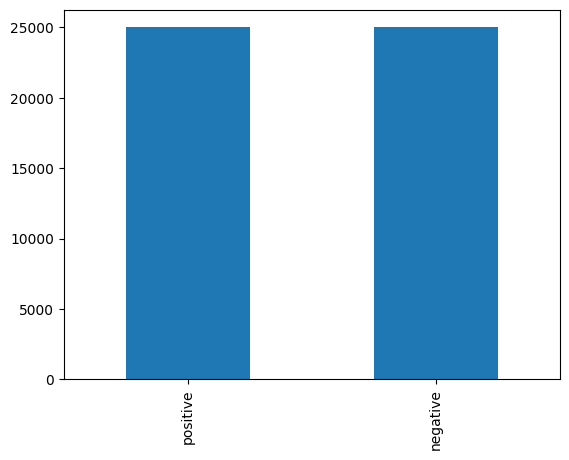

In [98]:
df['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

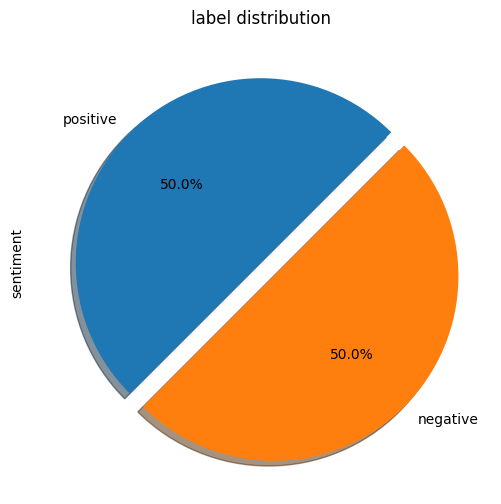

In [99]:
plt.figure(figsize=(10,6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

### work with text

In [100]:
df['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

### Cleaning Steps
#### removing HTML Tags
#### extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.
#### removing special chars,puntuation,sumbols
#### lower casing
#### removing stopwords
#### tokenization 

In [101]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [102]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

In [103]:
def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [104]:
df['review'] = df['review'].apply(lambda x: preprocessing(x))


In [105]:
df['review']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [106]:
df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})

### Visualizing Negative and Positive Words

In [107]:
positivedata = df[df['sentiment'] == 1]
positivedata = positivedata['review']
negdata = df[df['sentiment'] == 0]
negdata = negdata['review']

In [108]:
from collections import Counter

In [109]:
# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words


In [110]:
# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words


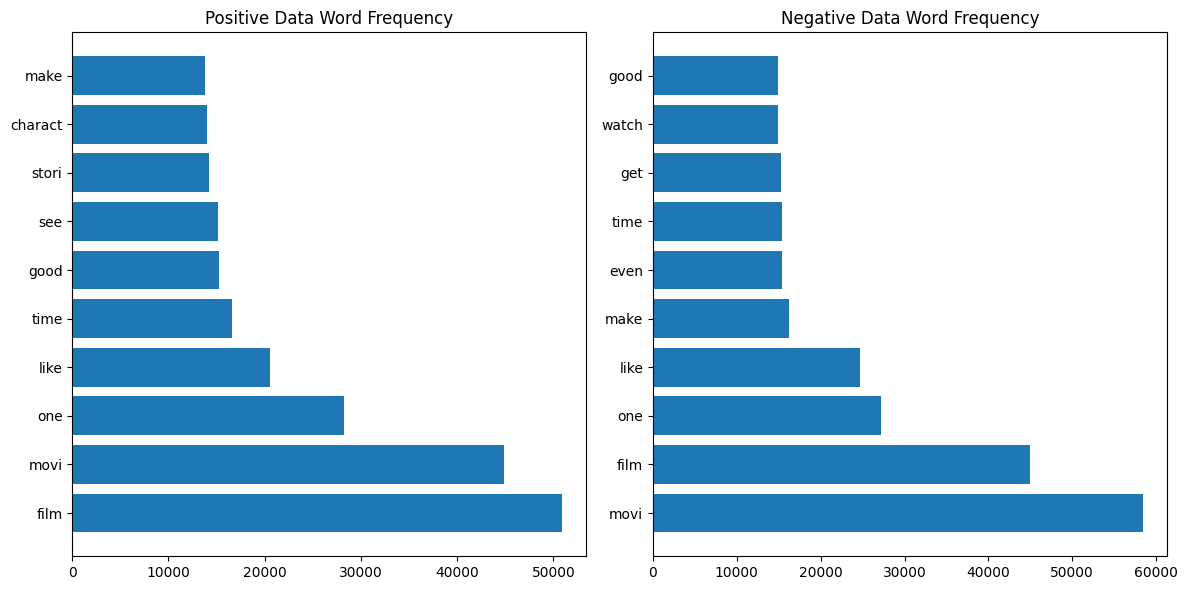

In [111]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

###  TF-IDF Vectorizer to convert categorical in to numerical vectors

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
x=tfidf.fit_transform(df['review'])
y=df['sentiment']

### Training Machine Learning Model for Sentiment Analysis

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [116]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB



### Logistic Regression

In [117]:
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)
clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   56.0s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


In [118]:
# clf.score(X_test,y_test)

In [119]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89076


### Random Forest

In [120]:
Rf =RandomForestClassifier(n_estimators=100)
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
y_pred_Rf=Rf.predict(X_test)
# Rf.score(X_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Rf))

Accuracy: 0.84976


### Naive Bayas

In [122]:
Nb=MultinomialNB()
Nb.fit(X_train,y_train)

MultinomialNB()

In [123]:
y_pred_Nb=Nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Nb))


Accuracy: 0.85844


In [124]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import cross_val_score

In [125]:
print(" Naive Bayas ",cross_val_score(MultinomialNB(),x,y))
print("Logistic Regression ",cross_val_score(LogisticRegressionCV(),x,y))
print("Random Forest",cross_val_score(RandomForestClassifier(),x,y))

 Naive Bayas  [0.8564 0.8637 0.8614 0.855  0.8615]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

KeyboardInterrupt: 

In [126]:
from sklearn.metrics import confusion_matrix , classification_report

### Classification Reports for all models 

In [127]:
## For Random Forest
report1=classification_report(y_test,y_pred_Rf)
print(report1)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12474
           1       0.85      0.85      0.85     12526

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [128]:
## For Naive Bayas
report2=classification_report(y_test,y_pred_Nb)
print(report2)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     12474
           1       0.87      0.84      0.86     12526

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [129]:
## For Logistic Regression
report3=classification_report(y_test,y_pred_clf)
print(report3)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12474
           1       0.88      0.90      0.89     12526

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



### Confusion metrix for all models

In [130]:
## For Logistic Regression
confusion_matrix(y_test,y_pred_clf)


array([[11009,  1465],
       [ 1266, 11260]], dtype=int64)

In [131]:
## For Random Forest
confusion_matrix(y_test,y_pred_Rf)

array([[10581,  1893],
       [ 1863, 10663]], dtype=int64)

In [132]:
## For Naive Bayas
confusion_matrix(y_test,y_pred_Nb)

array([[10953,  1521],
       [ 2018, 10508]], dtype=int64)

In [155]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

## Prediction

In [156]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



# prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [150]:
prediction=prediction('this product is really bad')

In [153]:

if prediction == 1:
    print("Positive Comment")
else:
    print("Negative Comment")    

Negative Comment
